# Lista  4 - Física Computacional II
Aluna: Ylana K S Lopes 

In [64]:
import matplotlib.pyplot as plt
import random as rd

from vpython import*
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>

### Problema 1: Jogo de Dados

In [3]:
### a)

primeiro = rd.randint(1,6)
segundo = rd.randint(1,6)

print('Primeiro dado:', primeiro)
print('Segundo dado:', segundo)

Primeiro dado: 2
Segundo dado: 5


In [4]:
aux = 0

for i in range(1000000):
    primeiro = rd.randint(1,6)
    segundo = rd.randint(1,6)
    if primeiro==6 and segundo==6:
        aux += 1
        
        
prob = aux/1e6
print('Fração de vezes do 6 duplo:', format(prob))

Fração de vezes do 6 duplo: 0.027796


### Problema 2: Cadeia de decaimento radioativo

In [34]:
Bi213 , Ti209 , Pb209 , Bi209 = 10000, 0, 0, 0
meiav_B = 46*60 
meiav_T = 2.2*60 
meiav_P = 3.3*60 

h = 1

t = np.arange(0,2e4,h)



def p(tau):
    return 1 - 2**(-1/tau)

In [35]:
listBi, listTl, listPb, listBi_09 = [], [], [], []


pBi = p(meiav_B)
pTl = p(meiav_T)
pPb = p(meiav_P)

In [36]:
for i in t:
    listBi.append(Bi213)
    listTl.append(Ti209)
    listPb.append(Pb209)
    listBi_09.append(Bi209)
    
    tempTl = 0
    tempPb = 0
    
    #c) Decaimento do Bi 213
    for q in range(Bi213):
        if rd.random()<(pBi*0.0209):
            tempTl += 1
        elif rd.random()<(pBi*0.9791):
            tempPb += 1
    Bi213 -= (tempTl + tempPb)
    Ti209 += tempTl
    Pb209 += tempPb
    
    #b) Decaimento do Tl
    tempTl = 0
    for q in range(Ti209):
        if rd.random()<pTl:
            tempTl += 1
    Ti209 -= tempTl
    Pb209 += tempTl
    
    #a) Decaimento do Pb
    tempPb = 0
    for j in range(Pb209):
        if rd.random()<pPb:
            tempPb += 1
    Pb209 -= tempPb
    Bi209 += tempPb

In [37]:
len(listBi)

20000

In [38]:
plt.plot(t, listBi, label="Bi 213")
plt.plot(t, listPb, label="Pb")
plt.plot(t, listTl, label="Tl")
plt.plot(t, listBi_09, label="Bi 209")
plt.xlabel("Tempo")
plt.ylabel("Número de átomo")
plt.legend()

### Problema 3: Movimento Browniano

In [65]:
def grid(xmax, dx):
    for x in range(-xmax, xmax+dx, dx):
        curve(pos = [vector(x,xmax,0), vector(x,-xmax,0)])
    for y in range(-xmax, xmax+dx, dx):
        curve(pos = [vector(xmax,y,0), vector(-xmax,y,0)])
    return

In [66]:
xi, yi = 0, 0 #posição inicial da partícula
pmin = -50 
pmax = 50 
tmax = 100 #'tempo' da simulação

scene2 = canvas(width = 500, height = 500,background = color.white)
par = sphere(radius=1, color = color.magenta)
grid(50,1)
for i in range(tmax):
    rate(20)
    par.pos = vector(xi, yi, 0)
    
    if random()<0.5:
        xi += 1
        if xi>pmax:
            xi -= 1
    else:
        xi -= 1
        if xi<pmin:
            xi+=1
                
    if random()<0.5:
        yi+=1
        if yi>pmax:
            yi-=1
    else:
        yi-=1
        if yi<pmin:
            yi+=1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Problema 4

In [5]:
#### a)
def p(x):
    return (-1/mu)*np.log(1-x)

In [6]:
N = 10000
mu = 1.0
num = []

for i in range(N):
    x = rd.random()
    num.append(p(x))
    


<IPython.core.display.Javascript object>


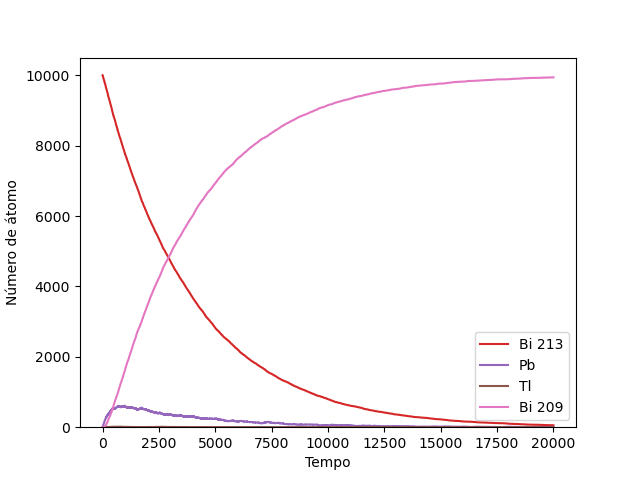

Text(0, 0.5, 'Números sorteados')

In [7]:
plt.hist(num, bins=50)
plt.xlabel('x')
plt.ylabel('Números sorteados')


In [12]:
### b)
x, y = [], []

def pg(x):
    return mu*np.sqrt(-2*np.log(1-x))

In [15]:
for i in range(N):
    r = pg(rd.random())
    theta = 2*np.pi*rd.random()
    
    temp1 = r*np.cos(theta)
    temp2 = r*np.sin(theta)
    
    x.append(temp1)
    y.append(temp2)

In [16]:
plt.hist(x, bins=50)
plt.hist(y, bins=50)

plt.show()

### Problema 5:

In [56]:
def f(x):
    return np.sin(1/x/(2-x))**2 ## função da integral do newman

In [57]:
a = 0 ## limites de integração
b = 2
A = (b-a)*1
N = 10000

x = np.random.random(N)*2
y = np.random.random(N)

In [58]:
### a)
fx = f(x)
count = np.sum(fx > y)

I1 = A*count/N
sigma1 = np.sqrt(I1*(A-I1)/N)



In [59]:
I1

1.4742

In [60]:
sigma1

0.008804171511278049

In [61]:
### b)
I2 = (b-a)/N*np.sum(fx)
var2 = np.sum(fx**2)/N - (np.sum(fx)/N)**2
sigma2 = (b-a)*np.sqrt(var2/N)

In [62]:
I2

1.4608810169418058

In [63]:
sigma2

0.005228713088588